## Kevin Smith CS506 Midterm Project

In [29]:
import pandas as pd
trainingSet = pd.read_csv("./data/train.csv")

## Exploration

Each review has the following attributes:
Id                          int64
ProductId                  object
UserId                     object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Time                        int64
Summary                    object
Text                       object
Score                     float64
Helpfulness               float64
dtype: object

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4            

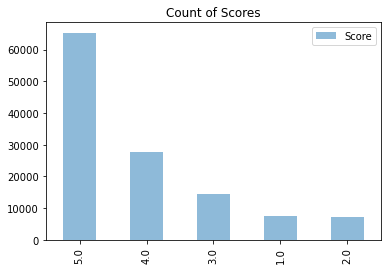

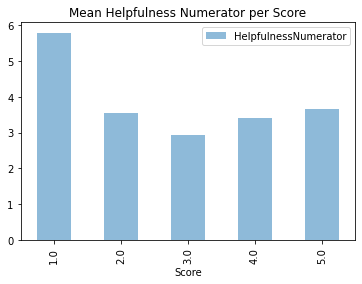

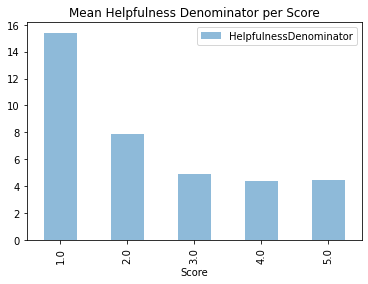

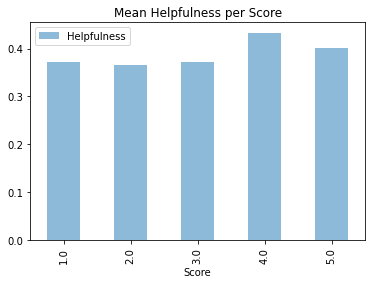

/var/folders/n1/mp2n6fsd09963xzzjvzq12g80000gn/T/ipykernel_73938/3394742300.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_star_reviews.loc[:, 'Hour'] = one_star_reviews['Time'].apply(getHour)


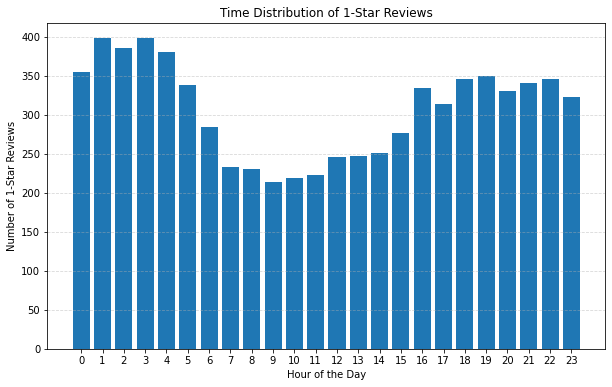

/var/folders/n1/mp2n6fsd09963xzzjvzq12g80000gn/T/ipykernel_73938/3394742300.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_star_reviews.loc[:, 'Hour'] = two_star_reviews['Time'].apply(getHour)


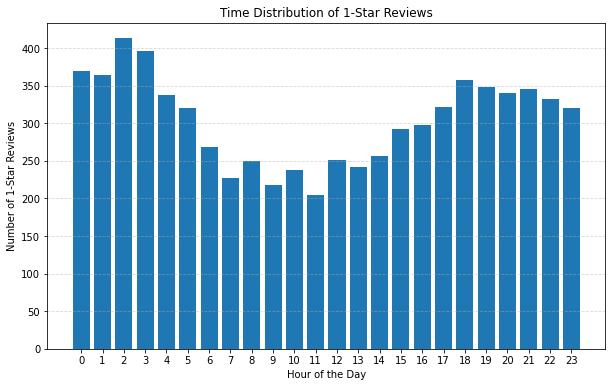

/var/folders/n1/mp2n6fsd09963xzzjvzq12g80000gn/T/ipykernel_73938/3394742300.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_star_reviews.loc[:, 'Hour'] = three_star_reviews['Time'].apply(getHour)


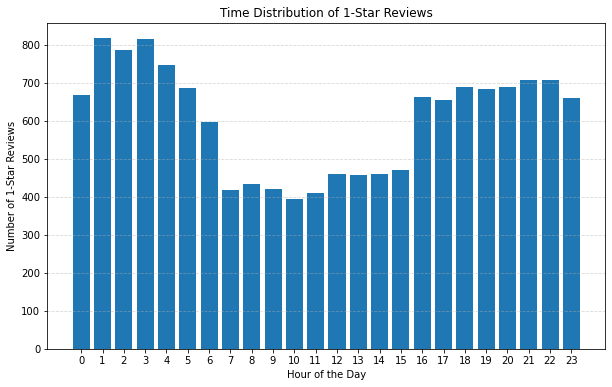

/var/folders/n1/mp2n6fsd09963xzzjvzq12g80000gn/T/ipykernel_73938/3394742300.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_star_reviews.loc[:, 'Hour'] = four_star_reviews['Time'].apply(getHour)


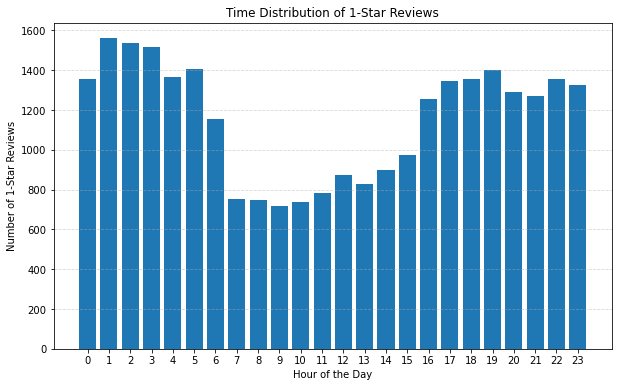

/var/folders/n1/mp2n6fsd09963xzzjvzq12g80000gn/T/ipykernel_73938/3394742300.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star_reviews.loc[:, 'Hour'] = five_star_reviews['Time'].apply(getHour)


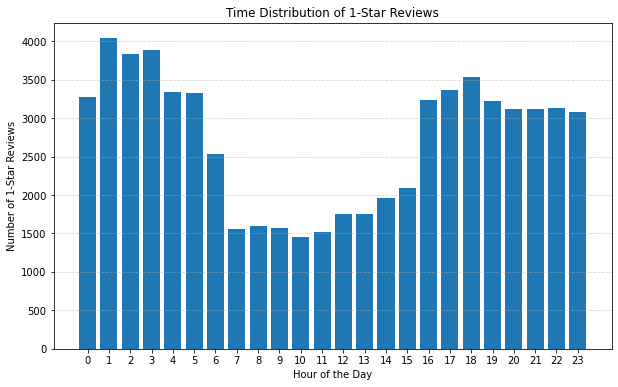

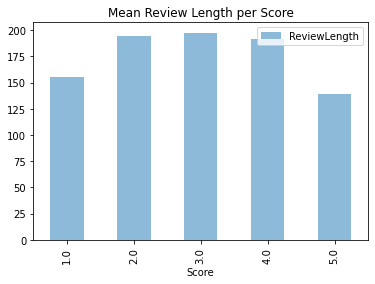

In [49]:
import matplotlib.pyplot as plt
import math

print("Each review has the following attributes:")
print(trainingSet.dtypes)
print()
print(trainingSet.head())
print()

#COUNT OF EACH SCORE
trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

#MEAN HELPFULNESS NUMERATOR PER SCORE
trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

#MEAN HELPFULNESS DENOMINATOR PER SCORE
trainingSet[['Score', 'HelpfulnessDenominator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Denominator per Score")
plt.show()

#MEAN HELPFULNESS PER SCORE
trainingSet['Helpfulness'] = trainingSet['HelpfulnessNumerator'] / trainingSet['HelpfulnessDenominator']
trainingSet['Helpfulness'] = trainingSet['Helpfulness'].fillna(0)
trainingSet[['Score', 'Helpfulness']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness per Score")
plt.show()

def getHour(time):
    return math.floor(time/(1000*3600))%24

#TIME DISTRIBUTION OF 1-STAR REVIEWS
one_star_reviews = trainingSet[trainingSet['Score'] == 1]
one_star_reviews.loc[:, 'Hour'] = one_star_reviews['Time'].apply(getHour)
hourly_counts = one_star_reviews['Hour'].value_counts().sort_index()
hourly_index = range(24)
hourly_counts = hourly_counts.reindex(hourly_index, fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 1-Star Reviews')
plt.title('Time Distribution of 1-Star Reviews')
plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#TIME DISTRIBUTION OF 2-STAR REVIEWS
two_star_reviews = trainingSet[trainingSet['Score'] == 2]
two_star_reviews.loc[:, 'Hour'] = two_star_reviews['Time'].apply(getHour)
hourly_counts = two_star_reviews['Hour'].value_counts().sort_index()
hourly_index = range(24)
hourly_counts = hourly_counts.reindex(hourly_index, fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 1-Star Reviews')
plt.title('Time Distribution of 1-Star Reviews')
plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#TIME DISTRIBUTION OF 3-STAR REVIEWS
three_star_reviews = trainingSet[trainingSet['Score'] == 3]
three_star_reviews.loc[:, 'Hour'] = three_star_reviews['Time'].apply(getHour)
hourly_counts = three_star_reviews['Hour'].value_counts().sort_index()
hourly_index = range(24)
hourly_counts = hourly_counts.reindex(hourly_index, fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 1-Star Reviews')
plt.title('Time Distribution of 1-Star Reviews')
plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#TIME DISTRIBUTION OF 4-STAR REVIEWS
four_star_reviews = trainingSet[trainingSet['Score'] == 4]
four_star_reviews.loc[:, 'Hour'] = four_star_reviews['Time'].apply(getHour)
hourly_counts = four_star_reviews['Hour'].value_counts().sort_index()
hourly_index = range(24)
hourly_counts = hourly_counts.reindex(hourly_index, fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 1-Star Reviews')
plt.title('Time Distribution of 1-Star Reviews')
plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#TIME DISTRIBUTION OF 5-STAR REVIEWS
five_star_reviews = trainingSet[trainingSet['Score'] == 5]
five_star_reviews.loc[:, 'Hour'] = five_star_reviews['Time'].apply(getHour)
hourly_counts = five_star_reviews['Hour'].value_counts().sort_index()
hourly_index = range(24)
hourly_counts = hourly_counts.reindex(hourly_index, fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 1-Star Reviews')
plt.title('Time Distribution of 1-Star Reviews')
plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#MEAN REVIEW LENGTH PER SCORE
trainingSet['ReviewLength'] = trainingSet.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
trainingSet[['Score', 'ReviewLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Review Length per Score")
plt.show()

## Feature Extraction

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#NEW FEATURES ARE EXTRACTED HERE
def process(df):
    
    ## SIMPLE EDITS ##
    
    df = df.rename(columns={'ProductId': 'MovieID'})
    df = df.rename(columns={'UserId': 'UserID'})
    
    df['Summary'] = df['Summary'].fillna('neutral')
    df['Text'] = df['Text'].fillna('neutral')
    df['Summary'] = df['Summary'].apply(lambda x : x.lower())
    df['Text'] = df['Text'].apply(lambda x : x.lower())
    
    ## SENTIMENT ANALYSIS ##
    
    analyzer = SentimentIntensityAnalyzer()

    def get_positivity_score(text):
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']
    
    textPS = df['Text'].apply(get_positivity_score)
    summaryPS = df['Summary'].apply(get_positivity_score)
    
    df['PositivityScore'] = textPS
    
    print(df.head())

    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

# Process the DataFrames
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)


        Id     MovieID          UserID  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        an unexplained anime review   
1                                         not great.   
2                    technical problem with this dvd   
3                          heeeeyyyyy laaaaadeee!!!!   
4  herzog the great traveler of both natural and ...   

                               

## Creating your model

Accuracy on testing set =  0.54
RMSE on testing set 10=  1.1610340218959994
Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.56      0.56        16
         2.0       0.00      0.00      0.00        20
         3.0       0.42      0.25      0.31        32
         4.0       0.33      0.25      0.28        57
         5.0       0.61      0.83      0.70       125

    accuracy                           0.54       250
   macro avg       0.38      0.38      0.37       250
weighted avg       0.47      0.54      0.49       250



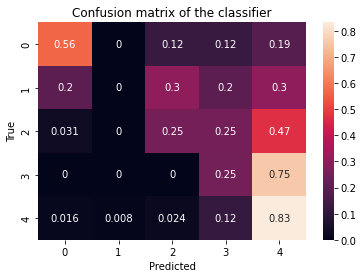

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.ensemble import AdaBoostClassifier

# Load training set with new features into DataFrame
trainingSet = pd.read_csv("./data/X_train.csv").sample(1000)

# SPLIT DATA INTO TRAINING & TESTING SETS
X_text = trainingSet['Text']
X_other = trainingSet[['HelpfulnessNumerator', 'HelpfulnessDenominator','PositivityScore']]  # Include other relevant columns
Y = trainingSet['Score']

X_text_train, X_text_test, X_other_train, X_other_test, Y_train, Y_test = train_test_split(
    X_text, X_other, Y, test_size=0.25, random_state=33)

# APPLY TF-IDF VECTORIZATION TO THE 'Text' COLUMN
tfidf_vectorizer = TfidfVectorizer()
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

# COMBINE TF-IDF VECTORIZED 'Text' COLUMN WITH OTHER COLUMNS
X_train = hstack((X_text_train_tfidf, X_other_train))
X_test = hstack((X_text_test_tfidf, X_other_test))

# TRAIN KNN CLASSIFIER
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, Y_train)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set 10= ", mean_squared_error(Y_test, Y_test_predictions)**(1/2))
print("Classification Report:\n", classification_report(Y_test, Y_test_predictions))


# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Create the Kaggle submission

In [113]:
X_submission = pd.read_csv("./data/X_test.csv")

X_submission_tfidf = tfidf_vectorizer.transform(X_submission['Text'])
X_submission_other = X_submission[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'PositivityScore']]
X_submission_combined = hstack((X_submission_tfidf, X_submission_other))

submission_predictions = model.predict(X_submission_combined)
submission = pd.DataFrame({'Id': X_submission['Id'], 'Score': submission_predictions})

submission.to_csv("./data/submission.csv", index=False)
print("Submission saved to submission.csv.")

Submission saved to submission.csv.


Now you can upload the `submission.csv` to kaggle